# Neural Net Investigations

> Using Four train/test sets, all derived from the same dataframe, this notebook investigates neural net models to determine the best predictions.

The four sets include:
- the features without the categorical Landcover_class feature (X_train and X_test)  
- the features with the categorical dummied (X_train_dum, X_test_dum)
- the features after PCA (Z_train, Z_test)
- the features after Polynomial Transformation and then PCA'd (Z_train_poly, Z_test_poly)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Helper Functions

In [17]:
def Plot_NN(model1):
  '''
  This function uses a neural net model (once fitted) to plot the loss and validation loss on one plot,
  and the RMSE and validation RMSE on another plot.
  '''
  fig, ax = plt.subplots(nrows = 2, ncols =1, figsize = (12, 12))
  ax[0].plot(model1.history['loss'], label = 'Training', color = 'blue'),
  ax[0].plot(model1.history['val_loss'], label = 'Testing', color = 'purple'),
  ax[0].title.set_text('Loss (Mean Squared Error)')
  ax[0].legend()

  ax[1].plot(model1.history['root_mean_squared_error'], label = 'Training', color = 'red'),
  ax[1].plot(model1.history['val_root_mean_squared_error'], label = 'Testing', color = 'orange'),
  ax[1].title.set_text('Root Mean Squared Error')
  ax[1].legend()



def First_Neural_Net_Eval(training, testing):
  '''
  This function runs a neural net model with 4 layers, each with regularization,
  to see if the different data can give the best model.

  The output is the plotting function: Plot_NN
  '''

  input_shape = training.shape[1]
  if input_shape < 16:
    first_layer = 16
  elif input_shape < 32:
    first_layer = 32
  elif input_shape < 64:
    first_layer = 64
  else:
    first_layer = 512
  es = EarlyStopping(patience = 5, monitor = 'val_root_mean_squared_error')
  model = Sequential()
  model.add(Dense(first_layer, 
                activation = 'relu',
                input_shape = (input_shape,)
                ))
  model.add(Dropout(0.25))

  model.add(Dense(first_layer*2, 
                activation = 'relu', 
                kernel_regularizer = l2(0.005)))
  model.add(Dropout(0.25))

  model.add(Dense(first_layer*3, 
                activation = 'relu', 
                kernel_regularizer = l2(0.05)))
  model.add(Dropout(0.45))

  model.add(Dense(first_layer, 
                activation = 'relu', 
                kernel_regularizer = l2(0.005)))
  model.add(Dropout(0.25))

  model.add(Dense(1, activation = None))

  model.compile(loss = 'mse', optimizer = 'adam', metrics = [RootMeanSquaredError()])

  res = model.fit(training, y_train,
                epochs = 100,
                batch_size = (training.shape[0] % 10),
                validation_data = (testing, y_test),
                callbacks = [es])
  print(res.history['root_mean_squared_error'][-1])
  print(res.history['val_root_mean_squared_error'][-1])


  return Plot_NN(res)

---

## Investigating All Fire Data

---

In [18]:
X_train = np.loadtxt('/X_train_without_outliers.csv', delimiter=',')
X_test = np.loadtxt('/X_test_without_outliers.csv', delimiter=',')
X_train_dum = np.loadtxt('/X_train_dummied_without_outliers.csv', delimiter=',')
X_test_dum = np.loadtxt('/X_test_dummied_without_outliers.csv', delimiter=',')
Z_train = np.loadtxt('/Z_train_without_outliers.csv', delimiter=',')
Z_test = np.loadtxt('/Z_test_without_outliers.csv', delimiter=',')
Z_train_poly = np.loadtxt('/Z_train_poly_without_outliers.csv', delimiter=',')
Z_test_poly = np.loadtxt('/Z_test_poly_without_outliers.csv', delimiter=',')
y_train = np.loadtxt('/y_train_without_outliers.csv', delimiter=',')
y_test = np.loadtxt('/y_test_without_outliers.csv', delimiter=',')

Epoch 1/100
431/431 [==============================] - 2s 3ms/step - loss: 5868.4316 - root_mean_squared_error: 76.5940 - val_loss: 5002.7739 - val_root_mean_squared_error: 70.7178
Epoch 2/100
431/431 [==============================] - 1s 3ms/step - loss: 5494.8003 - root_mean_squared_error: 74.1149 - val_loss: 4572.3452 - val_root_mean_squared_error: 67.6059
Epoch 3/100
431/431 [==============================] - 1s 3ms/step - loss: 5167.9419 - root_mean_squared_error: 71.8759 - val_loss: 4723.6548 - val_root_mean_squared_error: 68.7157
Epoch 4/100
431/431 [==============================] - 1s 3ms/step - loss: 5092.1592 - root_mean_squared_error: 71.3467 - val_loss: 4423.0957 - val_root_mean_squared_error: 66.4927
Epoch 5/100
431/431 [==============================] - 1s 3ms/step - loss: 5065.3799 - root_mean_squared_error: 71.1587 - val_loss: 4282.3911 - val_root_mean_squared_error: 65.4260
Epoch 6/100
431/431 [==============================] - 2s 5ms/step - loss: 5009.4482 - root_mea

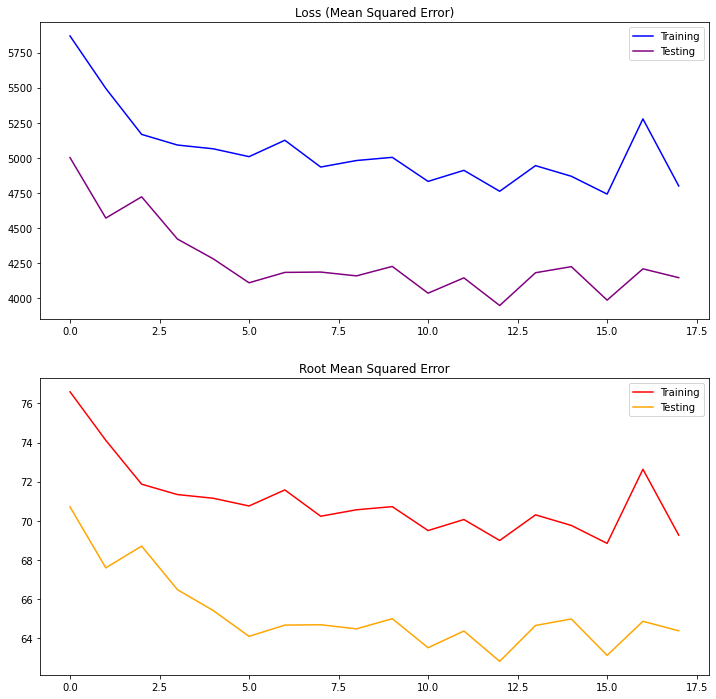

In [19]:
First_Neural_Net_Eval(X_train, X_test)

Epoch 1/100
431/431 [==============================] - 2s 4ms/step - loss: 5236.5791 - root_mean_squared_error: 72.0857 - val_loss: 5051.9849 - val_root_mean_squared_error: 70.8154
Epoch 2/100
431/431 [==============================] - 2s 4ms/step - loss: 4802.3057 - root_mean_squared_error: 69.0389 - val_loss: 4975.2524 - val_root_mean_squared_error: 70.2810
Epoch 3/100
431/431 [==============================] - 2s 5ms/step - loss: 4602.7944 - root_mean_squared_error: 67.5810 - val_loss: 4508.6729 - val_root_mean_squared_error: 66.8883
Epoch 4/100
431/431 [==============================] - 2s 5ms/step - loss: 4469.1787 - root_mean_squared_error: 66.5981 - val_loss: 4316.4824 - val_root_mean_squared_error: 65.4481
Epoch 5/100
431/431 [==============================] - 2s 4ms/step - loss: 4461.0552 - root_mean_squared_error: 66.5492 - val_loss: 4205.7534 - val_root_mean_squared_error: 64.6086
Epoch 6/100
431/431 [==============================] - 2s 4ms/step - loss: 4362.7656 - root_mea

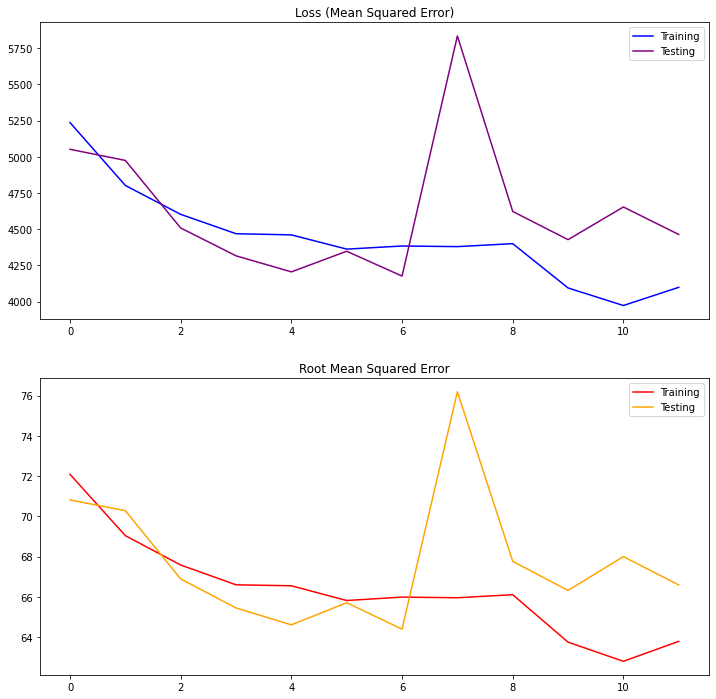

In [20]:
First_Neural_Net_Eval(X_train_dum, X_test_dum)

Epoch 1/100
431/431 [==============================] - 2s 4ms/step - loss: 5647.2373 - root_mean_squared_error: 75.1341 - val_loss: 4437.9995 - val_root_mean_squared_error: 66.6019
Epoch 2/100
431/431 [==============================] - 2s 5ms/step - loss: 5063.0156 - root_mean_squared_error: 71.1393 - val_loss: 4106.3125 - val_root_mean_squared_error: 64.0630
Epoch 3/100
431/431 [==============================] - 1s 3ms/step - loss: 4869.0190 - root_mean_squared_error: 69.7622 - val_loss: 4048.0168 - val_root_mean_squared_error: 63.6062
Epoch 4/100
431/431 [==============================] - 1s 3ms/step - loss: 4765.2520 - root_mean_squared_error: 69.0141 - val_loss: 3951.7896 - val_root_mean_squared_error: 62.8450
Epoch 5/100
431/431 [==============================] - 1s 3ms/step - loss: 4719.0493 - root_mean_squared_error: 68.6785 - val_loss: 3878.2825 - val_root_mean_squared_error: 62.2570
Epoch 6/100
431/431 [==============================] - 1s 3ms/step - loss: 4912.0317 - root_mea

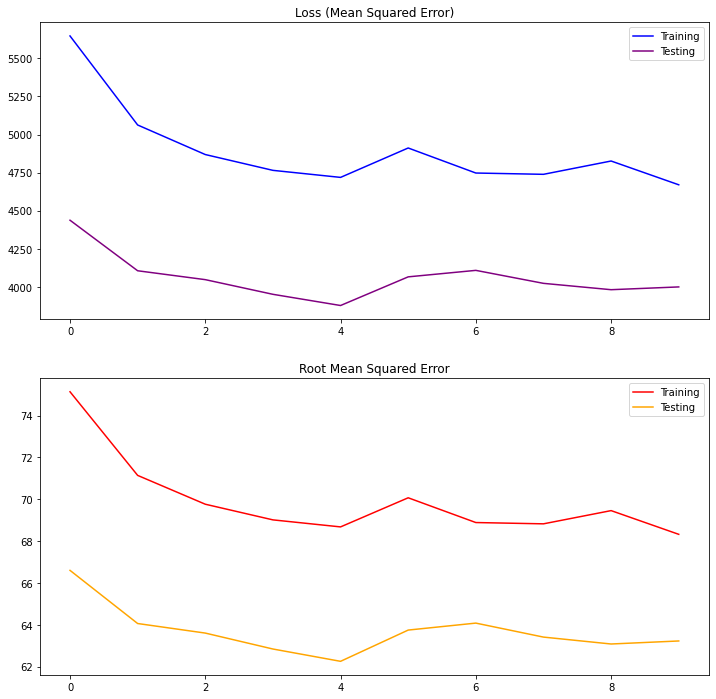

In [21]:
First_Neural_Net_Eval(Z_train, Z_test)

Epoch 1/100
431/431 [==============================] - 2s 4ms/step - loss: 5569.4302 - root_mean_squared_error: 74.5781 - val_loss: 4244.2749 - val_root_mean_squared_error: 65.0895
Epoch 2/100
431/431 [==============================] - 1s 3ms/step - loss: 5928.8301 - root_mean_squared_error: 76.9485 - val_loss: 4193.1758 - val_root_mean_squared_error: 64.6932
Epoch 3/100
431/431 [==============================] - 1s 3ms/step - loss: 5325.0000 - root_mean_squared_error: 72.9175 - val_loss: 3916.9512 - val_root_mean_squared_error: 62.5204
Epoch 4/100
431/431 [==============================] - 1s 3ms/step - loss: 5469.6021 - root_mean_squared_error: 73.9014 - val_loss: 3984.0247 - val_root_mean_squared_error: 63.0538
Epoch 5/100
431/431 [==============================] - 1s 3ms/step - loss: 4417.0098 - root_mean_squared_error: 66.3978 - val_loss: 3952.6777 - val_root_mean_squared_error: 62.8038
Epoch 6/100
431/431 [==============================] - 1s 3ms/step - loss: 4360.5571 - root_mea

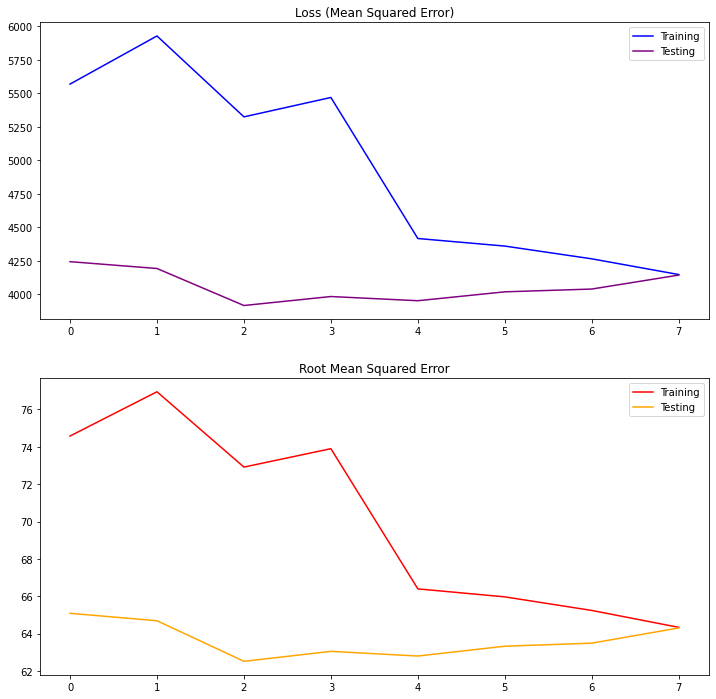

In [22]:
First_Neural_Net_Eval(Z_train_poly, Z_test_poly)